In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')


## Data Collection and Pre-processing

In [ ]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart_disease_data.csv')

In [ ]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**This Dataset Contains following features**

1. age: In Years
2. sex: (1 = male; 0 = female)
3. cp: chest pain type
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 1 or 0

In [ ]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# number of rows and columns in the dataset
print('Number of rows in the dataset: ',heart_data.shape[0])
print('Number of columns in the dataset: ',heart_data.shape[1])

Number of rows in the dataset:  303
Number of columns in the dataset:  14


In [ ]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**There is no Null values in the Dataset**

In [ ]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

 **Observations**
1. There are total 303 records and 14 features in dataset
2. The datatype of the features are either integer or float
3. In the outcome 0-----> Has no heart disease and 1------>Has heart disease


## Data Visualization

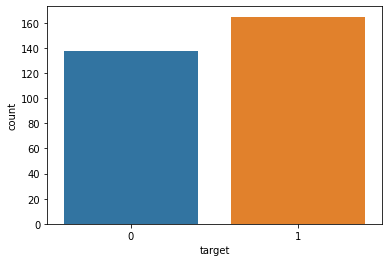

In [ ]:
# Outcome countplot
sns.countplot(x = 'target',data = heart_data)
plt.show()

We have 165 person with heart disease and 138 person without heart disease, so our data is balanced

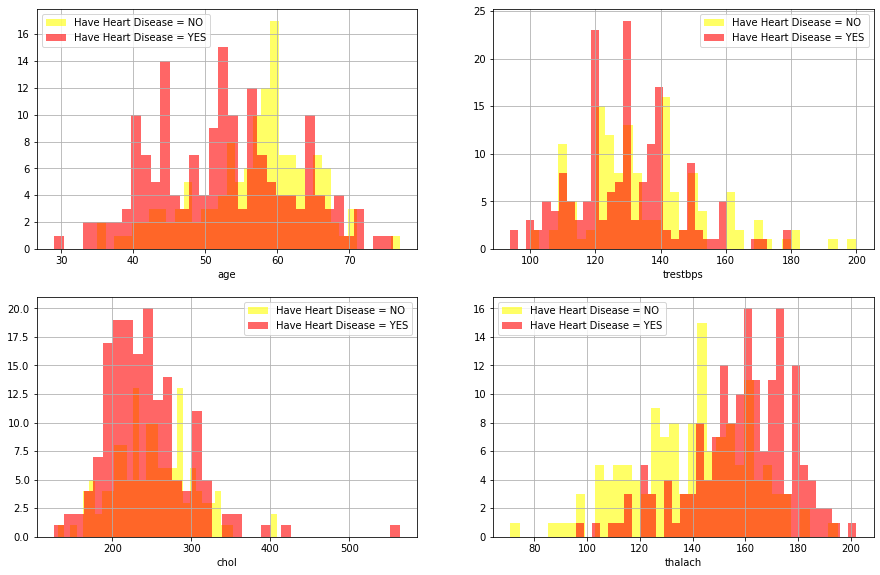

In [ ]:
continous_val = ['age', 'trestbps', 'chol', 'thalach']
plt.figure(figsize=(15, 15))
for i, column in enumerate(continous_val,1):
    plt.subplot(3, 2, i)
    heart_data[heart_data["target"] == 0][column].hist(bins=35, color='yellow', label='Have Heart Disease = NO', alpha=0.6)
    heart_data[heart_data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

1. **age** :  most of the people who have heart disease in the age group of 50-60

2. **trestbps** : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

3. **chol** {serum cholestoral in mg/dl} : above 200 is cause for concern.

4. **thalach** {maximum heart rate achieved} : People how acheived a maximum more than 140 are more likely to have heart disease.


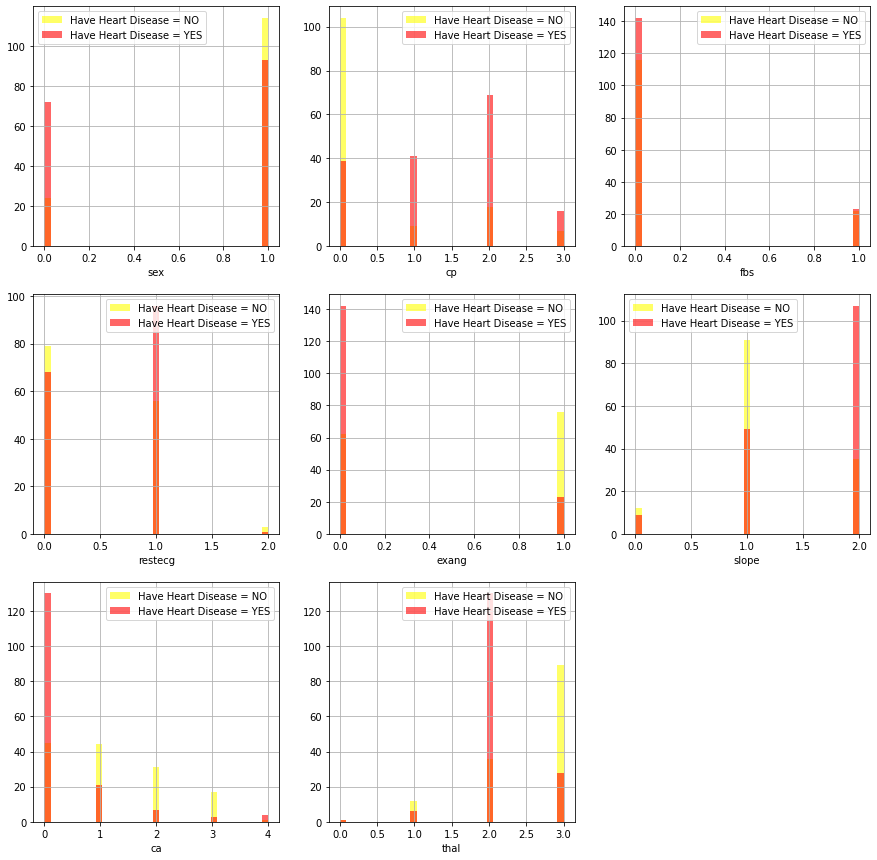

In [ ]:
categorical_val = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_val,1):
    plt.subplot(3, 3, i)
    heart_data[heart_data["target"] == 0][column].hist(bins=35, color='yellow', label='Have Heart Disease = NO', alpha=0.6)
    heart_data[heart_data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

1. **cp** {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.

2. **restecg** {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.

3. **exang** {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)

4. **slope** {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).

5. **ca** {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.

5. thal {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease

**Number of people who have heart disease according to age**

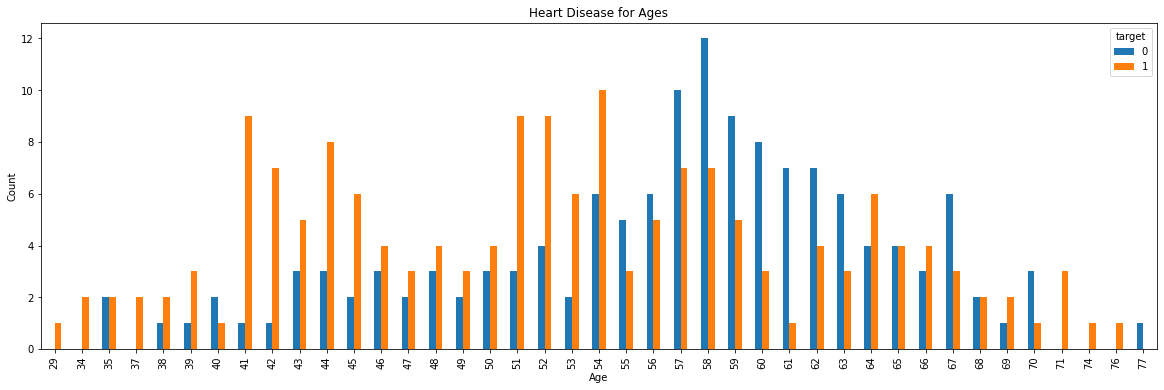

In [ ]:
pd.crosstab(heart_data.age,heart_data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease for Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

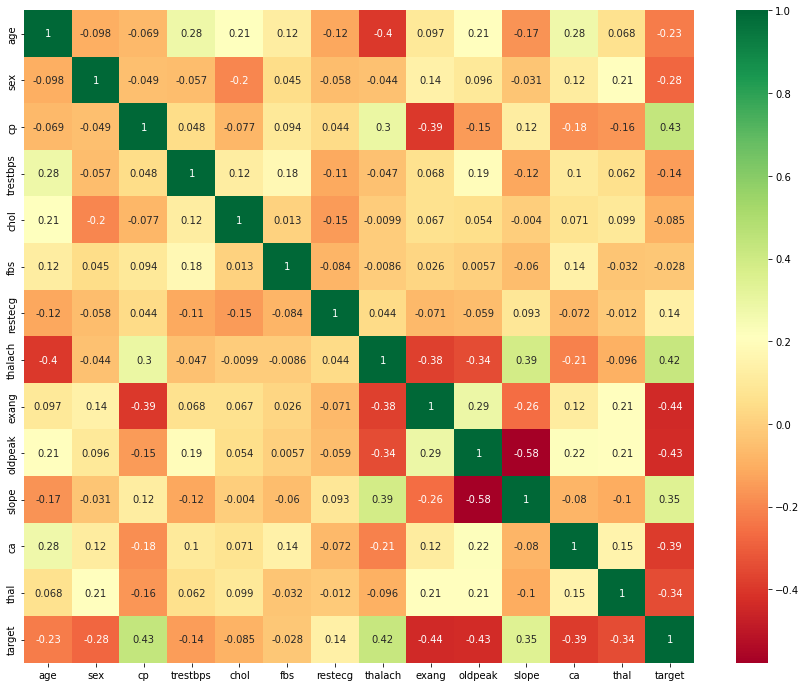

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(heart_data.corr(), annot=True,cmap ='RdYlGn')
plt.show()

## Model Building

Data standradization

In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
scaler = StandardScaler()
X =  pd.DataFrame(scaler.fit_transform(heart_data.drop(["target"],axis = 1),), columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [ ]:
#spliting the train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33,random_state=7)

In [ ]:
print('The Shape of X',X.shape)
print('The Shape of X_train',X_train.shape)
print('The Shape of X_test',X_test.shape)

The Shape of X (303, 13)
The Shape of X_train (203, 13)
The Shape of X_test (100, 13)


**Support vector machine**

In [ ]:
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
#prediction and accuracy_core
svc_pred = svc_model.predict(X_test)
test_data_accuracy = accuracy_score(svc_pred, Y_test)
print('Accuracy score of the SVM model: ', test_data_accuracy)

Accuracy score of the SVM model:  0.79


**Decision Tree**

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
#prediction and accuracy_core
predictions = dtree.predict(X_test)
test_data_accuracy = accuracy_score(predictions, Y_test)
print('Accuracy score of the decision tree model: ', test_data_accuracy)

Accuracy score of the decision tree model:  0.68


In [ ]:
#confusion matrix
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test,predictions))

[[26 22]
 [10 42]]
              precision    recall  f1-score   support

           0       0.72      0.54      0.62        48
           1       0.66      0.81      0.72        52

    accuracy                           0.68       100
   macro avg       0.69      0.67      0.67       100
weighted avg       0.69      0.68      0.67       100



In [ ]:
confusion_matrix(Y_test,predictions)
pd.crosstab(Y_test, predictions, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,26,22,48
1,10,42,52
All,36,64,100


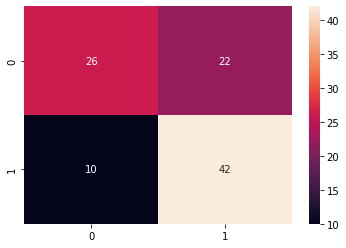

In [ ]:
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True)
plt.show()

**Random Forest**

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
#prediction and accuracy_score
rndm_predict = rfc.predict(X_test)
test_data_accuracy = accuracy_score(rndm_predict, Y_test)
print('Accuracy score of the Random Forest model: ', test_data_accuracy)

Accuracy score of the Random Forest model:  0.79


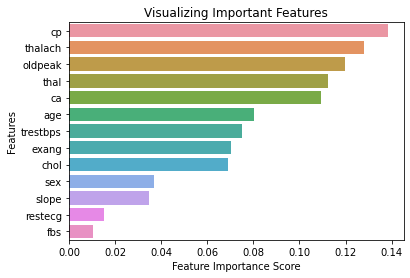

In [ ]:
# view the feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

In [ ]:
print(confusion_matrix(Y_test,rndm_predict))
print(classification_report(Y_test,rndm_predict))

[[33 15]
 [ 6 46]]
              precision    recall  f1-score   support

           0       0.85      0.69      0.76        48
           1       0.75      0.88      0.81        52

    accuracy                           0.79       100
   macro avg       0.80      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100



In [ ]:
confusion_matrix(Y_test,rndm_predict)
pd.crosstab(Y_test, rndm_predict, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,33,15,48
1,6,46,52
All,39,61,100


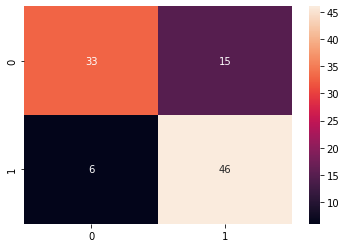

In [ ]:
sns.heatmap(confusion_matrix(Y_test, rndm_predict), annot=True)
plt.show()

**logistic Regression**

In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8817733990147784


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.79


**Building a Predictive System**

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)#using the logictic regeression model
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


**Saving the trained model**


In [ ]:
import pickle

In [ ]:
filename = 'heart_model.sav'
pickle.dump(svc_model,open(filename,'wb'))

In [ ]:
#oading the saved model
loaded_heart_model = pickle.load(open('heart_model.sav','rb'))

checking with saved model

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_heart_model.predict(input_data_reshaped)#using the pickle loaded model
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease
